## CODECLAUSE DATASCIENCE INTERNSHIP
## Sumit Pawar
## TASK - 1
## FAKE NEWS DETECTION

In [5]:
import numpy as np
import pandas as pd

In [6]:
# Importing the csv file

df = pd.read_csv('news.csv')

In [7]:
# First 5 row of dataset

df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
# last 5 row of dataset

df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [11]:
# shape of the dataset

df.shape

(6335, 4)

In [12]:
# to check for duplicate values

df.duplicated().sum()

0

In [13]:
# Removing the duplicates

df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
# Is there any null values is the dataset

df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [16]:
# Removing the unnamed column

df=df.drop('Unnamed: 0',axis=1)

In [17]:
df.sample(10)

,title,text,label
314,Furious parents slam ‘damaging’ BBC sex change...,"By wmw_admin on October 31, 2016 Sanchez Manni...",FAKE
4012,Talk radio rallies around Ted Cruz,"Killing Obama administration rules, dismantlin...",REAL
584,Hillary’s “Big Tent” is Obama’s “Grand Bargain...,2016 presidential campaign by BAR executive ed...,FAKE
3150,Republicans finally pass an Obamacare repeal. ...,Republicans have never passed an Obamacare rep...,REAL
3543,Podesta WikiLeaks UFO Updates — New Names Drag...,Here is a review of some of the latest signifi...,FAKE
4916,Rise of Mandatory Vaccinations Means the End o...,posted by Eddie Mandatory vaccinations are abo...,FAKE
606,"Trump, Sanders trade blame over Chicago protests","CHICAGO —Donald Trump, the GOP presidential fr...",REAL
5751,Hillary Clinton explains why she won't say 'ra...,Syrians wait near the Turkish border during cl...,REAL
6028,The State Department hasn’t been authorized in...,Some of the biggest issues facing America this...,REAL
4144,RNC chairman: 'We're going to embrace whoever ...,"""I think it's pretty clear we're going to embr...",REAL


In [18]:
# Checking how many outputes do we have

l = df.label;
l.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [19]:
# Statistical description

df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [20]:
# Deleting the title column as we want to work on title column

df=df.drop('title',axis=1)

In [21]:
df.sample(10)

,text,label
3082,\nHillary supporters can stop panicking. The...,FAKE
4462,"License DMCA The American journalist, Edward B...",FAKE
3864,"It has been 1,700 years since Emperor Constant...",FAKE
3322,(CNN) The shootings' main similarity is that t...,REAL
3514,"RT October 26, 2016 \nAround 300 civilians wer...",FAKE
5907,"""It ought be a local decision. I mean, a state...",REAL
3602,Facebook’s 1.44 billion users rely on the site...,REAL
3264,"As pieces of luggage, human remains, wreckage ...",REAL
6025,"No, not the number of primaries he’s won, or t...",REAL
3907,BREAKING : After Embarrassingly Low Turnout at...,FAKE


### DATA VISUALIZATION

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

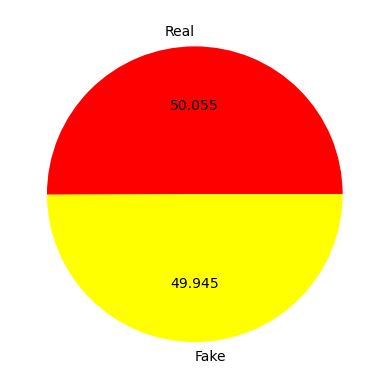

In [54]:
#pie chart

plt.pie(df['label'].value_counts(),labels=['Real','Fake'],colors=['red','yellow'],autopct='%0.3f')
plt.show()

#### Data is well distributed

In [40]:
# function to change the texts (title,text) machine understandable

import re

def convert(text):
    text = text.lower()
    text = re.sub(r'https?://S+|www\.\S+' , '' , text)
    text = re.sub('\n' , '' , text)
    text = re.sub('\[.*?\]', '', text)
    words = []
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)

In [41]:
import string

df["text"] = df["text"].apply(convert)

In [42]:
df

,text,label
0,daniel greenfield a shillman journalism fellow...,0
1,google pinterest digg linkedin reddit stumbleu...,0
2,us secretary of state john f kerry said monday...,1
3,— kaydee king kaydeeking november 9 2016 the l...,0
4,its primary day in new york and frontrunners h...,1
...,...,...
6330,the state department told the republican natio...,1
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...,0
6332,antitrump protesters are tools of the oligarc...,0
6333,addis ababa ethiopia —president obama convened...,1


### Making Data Ready for Model fitting

In [43]:
#to make the label neumerical from categorical

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.sample(10)

,text,label
2614,google pinterest digg linkedin reddit stumbleu...,0
2056,russian president vladimir putin said moscow w...,1
1936,a new decree by the russian government would r...,1
2358,mi5 chief gives first ever interview to press ...,0
931,new jersey gov chris christie r hasnt yet said...,1
4891,shouts of ‘not my president’ in california fol...,0
5036,one should not insist on nailing into positio...,1
2983,cnn donald trump is striking back at mitt romn...,1
6277,washington cnn part of the aggressive outreach...,1
543,vanessa tijerina was not politically active un...,1


#### 1 means fake and 0 means real

In [44]:
x=df['text']
y=df['label']

In [45]:
# Splitting into training and testing dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'], test_size=0.2, random_state=7)

In [46]:
x_train

6237    the head of a leading survivalist group has ma...
3722    ‹ › arnaldo rodgers is a trained and educated ...
5774    patty sanchez 51 used to eat 13000 calories a ...
336     but benjamin netanyahu’s reelection was regard...
3622    john kasich was killing it with these iowa vot...
                              ...                        
5699                                                     
2550    it’s not that americans won’t elect wealthy pr...
537     anyone writing sentences like ‘nevertheless fu...
1220    more catholics are in congress than ever befor...
4271    it was hosted by cnn and the presentation was ...
Name: text, Length: 5068, dtype: object

In [47]:
# To convert Text Data to vectors

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train= vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [48]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
LogisticRegression()
pred_lr=LR.predict(x_test)
LR.score(x_test, y_test)

0.9187056037884768

### TESTING

In [49]:
def answer(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def test(n):
    test_n = {"text":[n]}
    new_def_test = pd.DataFrame(test_n)
    new_def_test["text"] = new_def_test["text"].apply(convert) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)

    return print("Prediction: {} ".format(answer(pred_LR[0])))

In [50]:
n="october    at   am  pretty factual except for women in the selective service  american military is still voluntary only and hasn t been a draft since vietnam war  the comment was made by a  star general of the army about drafting women and he said it to shut up liberal yahoos"
test(n) # original fake news


Prediction: Fake News 


In [51]:
n='shocking  michele obama   hillary caught glamorizing date rape promoters first lady claims moral high ground while befriending rape glorifying rappers infowars com   october    comments  alex jones breaks down the complete hypocrisy of michele obama and hillary clinton attacking trump for comments he made over a decade ago while the white house is hosting and promoting rappers who boast about date raping women and selling drugs in their music   rappers who have been welcomed to the white house by the obama s include  rick ross   who promotes drugging and raping woman in his song  u o n e o    while attacking trump as a sexual predator  michelle and hillary have further mainstreamed the degradation of women through their support of so called musicians who attempt to normalize rape  newsletter sign up get the latest breaking news   specials from alex jones and the infowars crew  related articles'
test(n) # original answer fake news

Prediction: Fake News 


### SAVING THE MODEL

In [52]:
import pickle

In [53]:
pickle.dump(LR,open('fake_news_detector.pkl','wb'))